# Spatial Data Notebook Assignment 2
## By: Alexander Miller

In [16]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

dem_fname = 'rcew_dem_5m_.tif'
nbins = 35

In [17]:
rcew_dem = rio.open(dem_fname)
rcew_dem

<open DatasetReader name='rcew_dem_5m_.tif' mode='r'>

In [18]:
rcew_dem.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.402823e+38,
 'width': 2940,
 'height': 5750,
 'count': 1,
 'crs': CRS.from_epsg(26911),
 'transform': Affine(5.0, 0.0, 511030.85,
        0.0, -5.0, 4795946.63)}

In [19]:
rcew_elev = rcew_dem.read(1)
rcew_elev

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [20]:
rcew_elev = np.where(rcew_elev<0, np.nan, rcew_elev)
rcew_elev

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

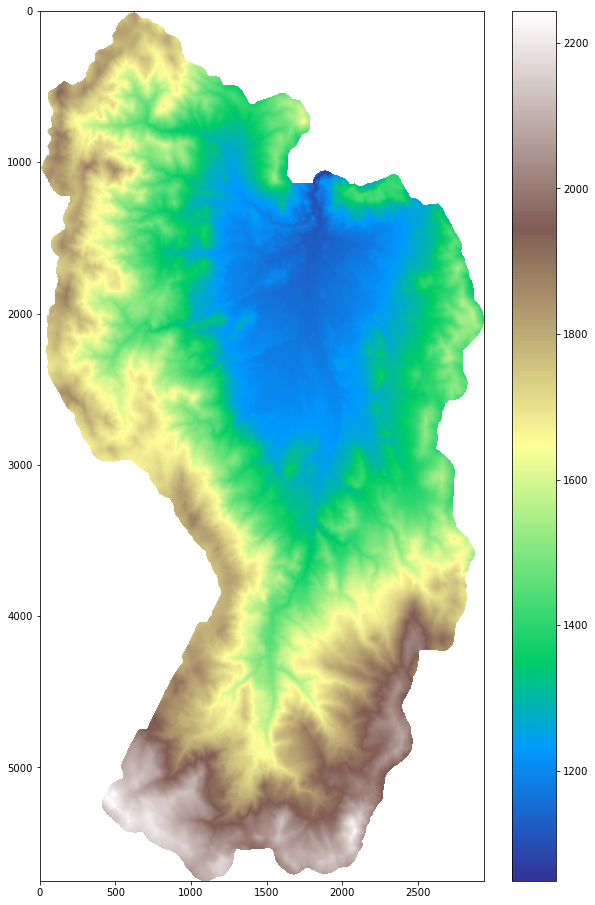

In [21]:
plt.figure(figsize=(10,16))
plt.imshow(rcew_elev, cmap='terrain')
plt.colorbar()
plt.show

### Compute the Hypsometric Curve

In [22]:
f_elev, b_elev = np.histogram(rcew_elev[~np.isnan(rcew_elev)], bins=nbins)
print(f_elev)
print(b_elev)

[  1619  11914 152342 438122 594588 501777 456786 510649 470118 430887
 471721 469855 477990 427215 363346 354675 396460 423829 457140 434510
 417715 476529 390886 251801 185235 169748 164541 182518 173834 153810
 170081 113015  91200  42992  10121]
[1048.7723 1082.9165 1117.0605 1151.2047 1185.3489 1219.4929 1253.6371
 1287.7812 1321.9253 1356.0695 1390.2136 1424.3577 1458.5018 1492.646
 1526.79   1560.9342 1595.0784 1629.2224 1663.3666 1697.5106 1731.6548
 1765.799  1799.943  1834.0872 1868.2313 1902.3754 1936.5195 1970.6637
 2004.8077 2038.9519 2073.096  2107.2402 2141.3843 2175.5283 2209.6726
 2243.8167]


In [23]:
bin_centers  = (b_elev[0:-1] + b_elev[1:])/2
bin_centers

array([1065.8445, 1099.9885, 1134.1326, 1168.2769, 1202.4209, 1236.565 ,
       1270.7092, 1304.8533, 1338.9973, 1373.1416, 1407.2856, 1441.4297,
       1475.574 , 1509.718 , 1543.862 , 1578.0063, 1612.1504, 1646.2944,
       1680.4386, 1714.5828, 1748.7268, 1782.871 , 1817.0151, 1851.1592,
       1885.3033, 1919.4475, 1953.5916, 1987.7357, 2021.8799, 2056.024 ,
       2090.168 , 2124.3123, 2158.4563, 2192.6006, 2226.7446],
      dtype=float32)

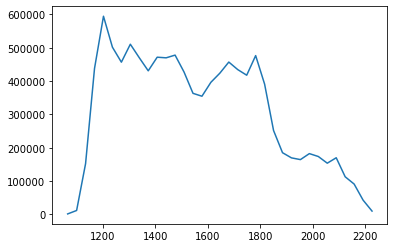

In [24]:
plt.plot(bin_centers, f_elev)

In [25]:
hypso_rcew = 1.0 - np.cumsum((f_elev / np.sum(f_elev)))
hypso_rcew

array([ 9.99850640e-01,  9.98751519e-01,  9.84697270e-01,  9.44278504e-01,
        8.89425032e-01,  8.43133800e-01,  8.00993194e-01,  7.53883480e-01,
        7.10512936e-01,  6.70761633e-01,  6.27243205e-01,  5.83896924e-01,
        5.39800153e-01,  5.00387608e-01,  4.66867271e-01,  4.34146874e-01,
        3.97571619e-01,  3.58471448e-01,  3.16298185e-01,  2.76212643e-01,
        2.37676516e-01,  1.93714529e-01,  1.57653501e-01,  1.34423703e-01,
        1.17334924e-01,  1.01674891e-01,  8.64952287e-02,  6.96571054e-02,
        5.36201209e-02,  3.94304423e-02,  2.37396893e-02,  1.33135367e-02,
        4.89991807e-03,  9.33708711e-04, -2.22044605e-16])

Text(0, 0.5, 'Fraction of Elevation Above [-]')

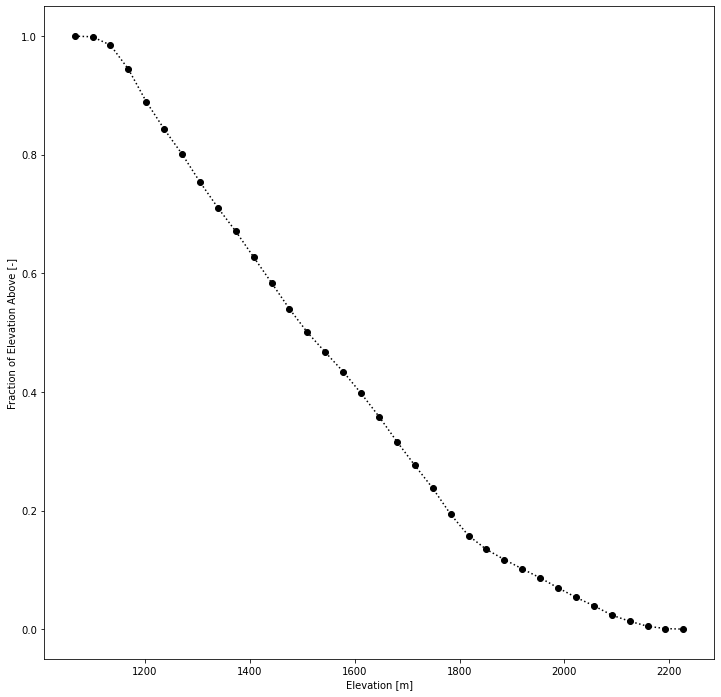

In [26]:
plt.figure(figsize=(12,12))
plt.plot(bin_centers, hypso_rcew,'ko:')
plt.xlabel('Elevation [m]')
plt.ylabel('Fraction of Elevation Above [-]')

### Algorithm for Visualizing the Bottom and Top 1/2 of Elevation

1. Find the elvation corresponding tp hypsometric curve values of (1/3) and (2/3), using np.interp() (call it, for instance z_33 and z_66

2. Use the np.where(rcew_elev < z_66,  ,  ) to get bottom of elevations
3. use plt.imshow() to plot the DEM of the top and bottom 1/3 of the watershed

In [27]:
z_33 = np.interp(1/3,bin_centers, hypso_rcew)                       
z_66 = np.interp(2/3,bin_centers, hypso_rcew)       
z_66

0.9998506398178747

In [28]:
bottom_elev = np.where(rcew_elev < z_66, np.nan, rcew_elev)
bottom_elev

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

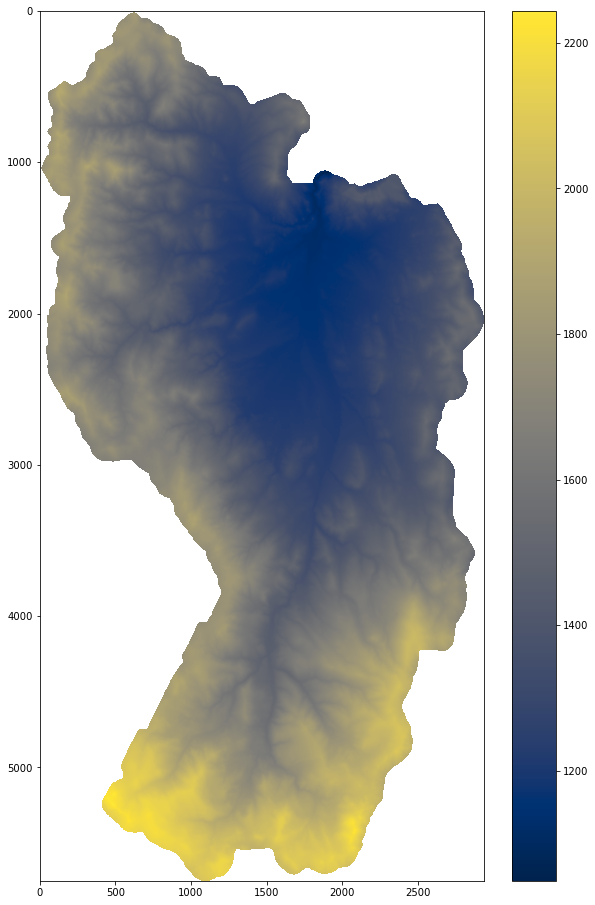

In [29]:
plt.figure(figsize=(10,16))
plt.imshow(bottom_elev, cmap='cividis')
plt.colorbar()
plt.show